Uma aplicação de `clusterização` utilizando a base de dados `Penguins`, que pode ser encontrada no [Kaggle](https://www.kaggle.com). O código a seguir é uma reprodução do código [desta página](https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering), com o acréscimo de alguns comentários.

In [1]:
import pandas as pd                                 # Importando o Pandas
import matplotlib.pyplot as plt                     # Importando o Matplotlib
from sklearn.decomposition import PCA               # Importando o PCA (mais informações em outras células)
from sklearn.cluster import KMeans                  # Importando o k-means
from sklearn.preprocessing import StandardScaler    # Importando o z-score para modificar as escalas dos dados
import warnings

# Evitando o aparecimento de avisos sobre modificações futuras sobre alguma biblioteca
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Carregando o arquivo .csv da base de dados Penguins
penguins_df = pd.read_csv("../datasets/penguin/penguins.csv")
# Mostrando as 5 primeiras instâncias
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Removendo as instâncias com missing values
penguins_df = penguins_df.dropna()

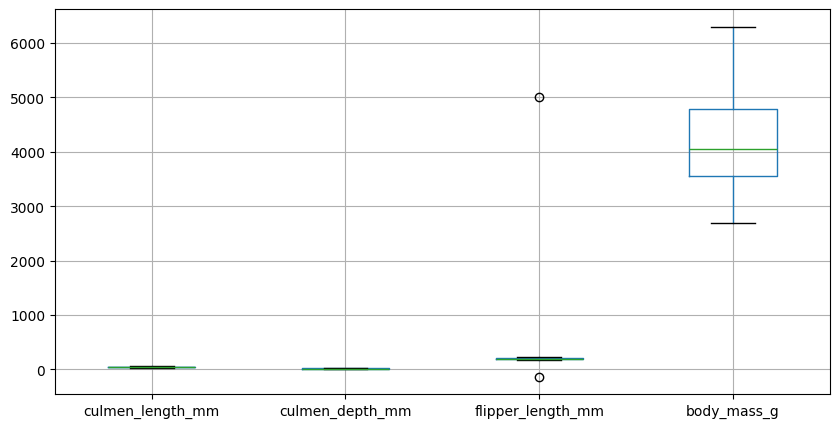

In [10]:
# Utilizando o gráfico de boxplot para encontrar outliers.
# Sobre o boxplot:
#   O gráfico mosta a distribuição de um conjunto de dados. Os limites superior e inferior da caixa marcam os limites dos 50% de dados centrais (ou seja, ao redor da mediana), e a linha horizontal* marca o valor da mediana. As linhas verticais* saindo da caixa marcam a faixa de valores do restante dos dados (ou seja, além dos 50% centrais). Os pontos fora das linhas verticais indicam outliers, ou seja, valores que não correspondem estatisticamente com aquela distribuição.
#
# * Considerando a imagem apresentada a seguir. Um boxplot pode aprensentar uma caixa deitada, então, a mediana seria marcada por uma linha vertical, e as linhas saindo da caixa seriam horizontais.

penguins_df.boxplot(figsize=(10, 5))
plt.show()

In [11]:
# A partir do gráfico é possível observar que para o atributo flipper_length_mm temos dois outliers. Na linha a seguir, descobrimos o índice do outlier com valor acima de 4000 para esse atributo, e na célula a seguir, descobrimos o índice do outlier com valor menor do que 0.

penguins_df[penguins_df["flipper_length_mm"] > 4000]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE


In [12]:
penguins_df[penguins_df["flipper_length_mm"] < 0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE


In [13]:
# Uma vez descobertos os índices, retiramos essas instâncias do nosso DataFrame

penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [15]:
# Transformando a coluna sex em duas mais específicas: uma somente para inferir o sexo feminino, e outra para o masculino. Não ficou claro o motivo do autor do código em fazer essa separação, pois seria perfeitamente possível continuar com apenas uma coluna e transformar as categorias em valores numéricos e com escala padronizada.

df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [17]:
# Criando e aplicando o z-score

scaler = StandardScaler()
X = scaler.fit_transform(df)

# Gerando um novo DataFrame, porém com os dados já préprocessados.
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [18]:
# Criando e executando o PCA sobre os dados.
#
# De forma bastante simplificada, o PCA 'gera' novos atributos a partir dos originais. O objetivo é termos uma redução de dimensionalidade (ou seja, uma redução da quantidade de atributos) e, ao mesmo tempo, cada atributo terá o máximo de informação possível sobre os dados. A maior quantidade de informação estará sobre o primeiro componente. O segundo deverá ter uma boa quantidade de informação também, mas terá menos que o primeiro, e assim por diante. A quantidade de componentes gerados é a mesma quantidade de atributos. Porém, uma vez que a partir do primeiro componente cada um tem o máximo de informação possível, isso nos possibilita escolher um subconjunto menor de 'atributos' que tenha uma quantidade suficiente de informação sobre a base.
# 
# Uma postagem de site (em Inglês) que explica com mais detalhes: https://builtin.com/data-science/step-step-explanation-principal-component-analysis.

pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_

array([0.51973484, 0.34424041, 0.08591863, 0.03225427, 0.01686049,
       0.00099136])

In [19]:
# A partir da análise feita na célula anterior, se pegarmos somente os componentes cuja variância explicada está acima de 0.1, selecionamos apenas os dois primeiros componentes que, juntos, possuem uma razão de explicação de variância de 0.84. A adição do terceiro componente seria desejável, pois a explicação iria para quase 0.95. Contudo, vamos seguir o exemplo original.

n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

2


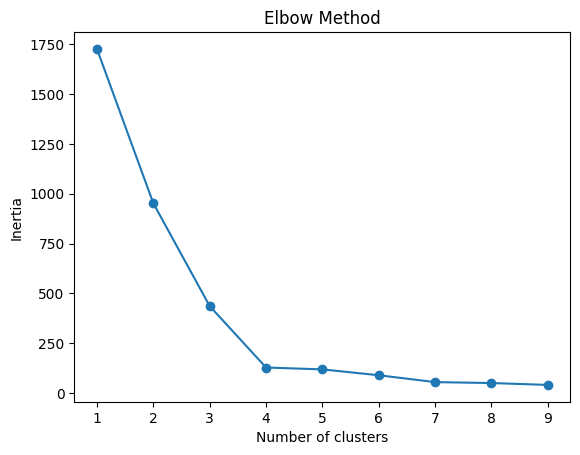

In [20]:
# Verificando, pelo método elbow, o melhor valor para k.
#   O k-means é executado 9 vezes, com o valor de k variando entre 1 e 9. Ao fim da execução verificamos seu valor de inércia, ou seja, as somas das distâncias de cada instância e seu respectivo centroide. Logo em seguida plotamos os resultados e é perceptível que, para a nossa base préprocessada (incluindo a utilização do PCA), o melhor valor para k é 4. Valores acima de 4 geram maior custo computacional sem uma melhora significativa da métrica utilizada.

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

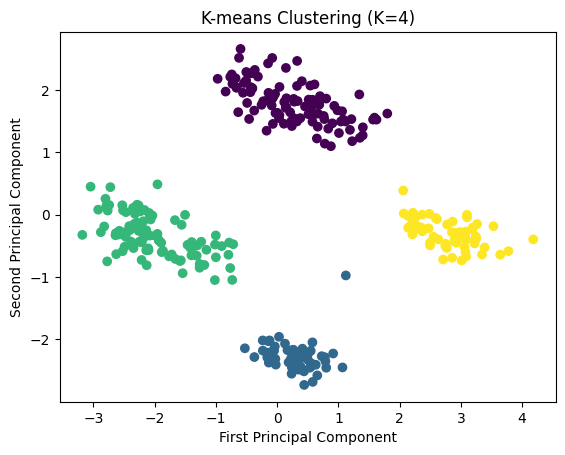

In [21]:
# Executando o k-means com k = 4 e verificando visualmente a clusterização

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

A análise a partir daqui pode seguir o passo 6 em diante [desse post](https://drlee.io/the-ultimate-step-by-step-guide-to-data-mining-with-pca-and-kmeans-83a2bcfdba7d).

TODO: implementar o Passo 6 em diante.